<a href="https://colab.research.google.com/github/EricMarcantonio/EECS3481-Assignment2/blob/main/Assignment_2_Eric_Marcantonio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment \#2**
## Eric Marcantonio
## 216206393
## EECS 3481

In [ ]:
import math

# 6.4

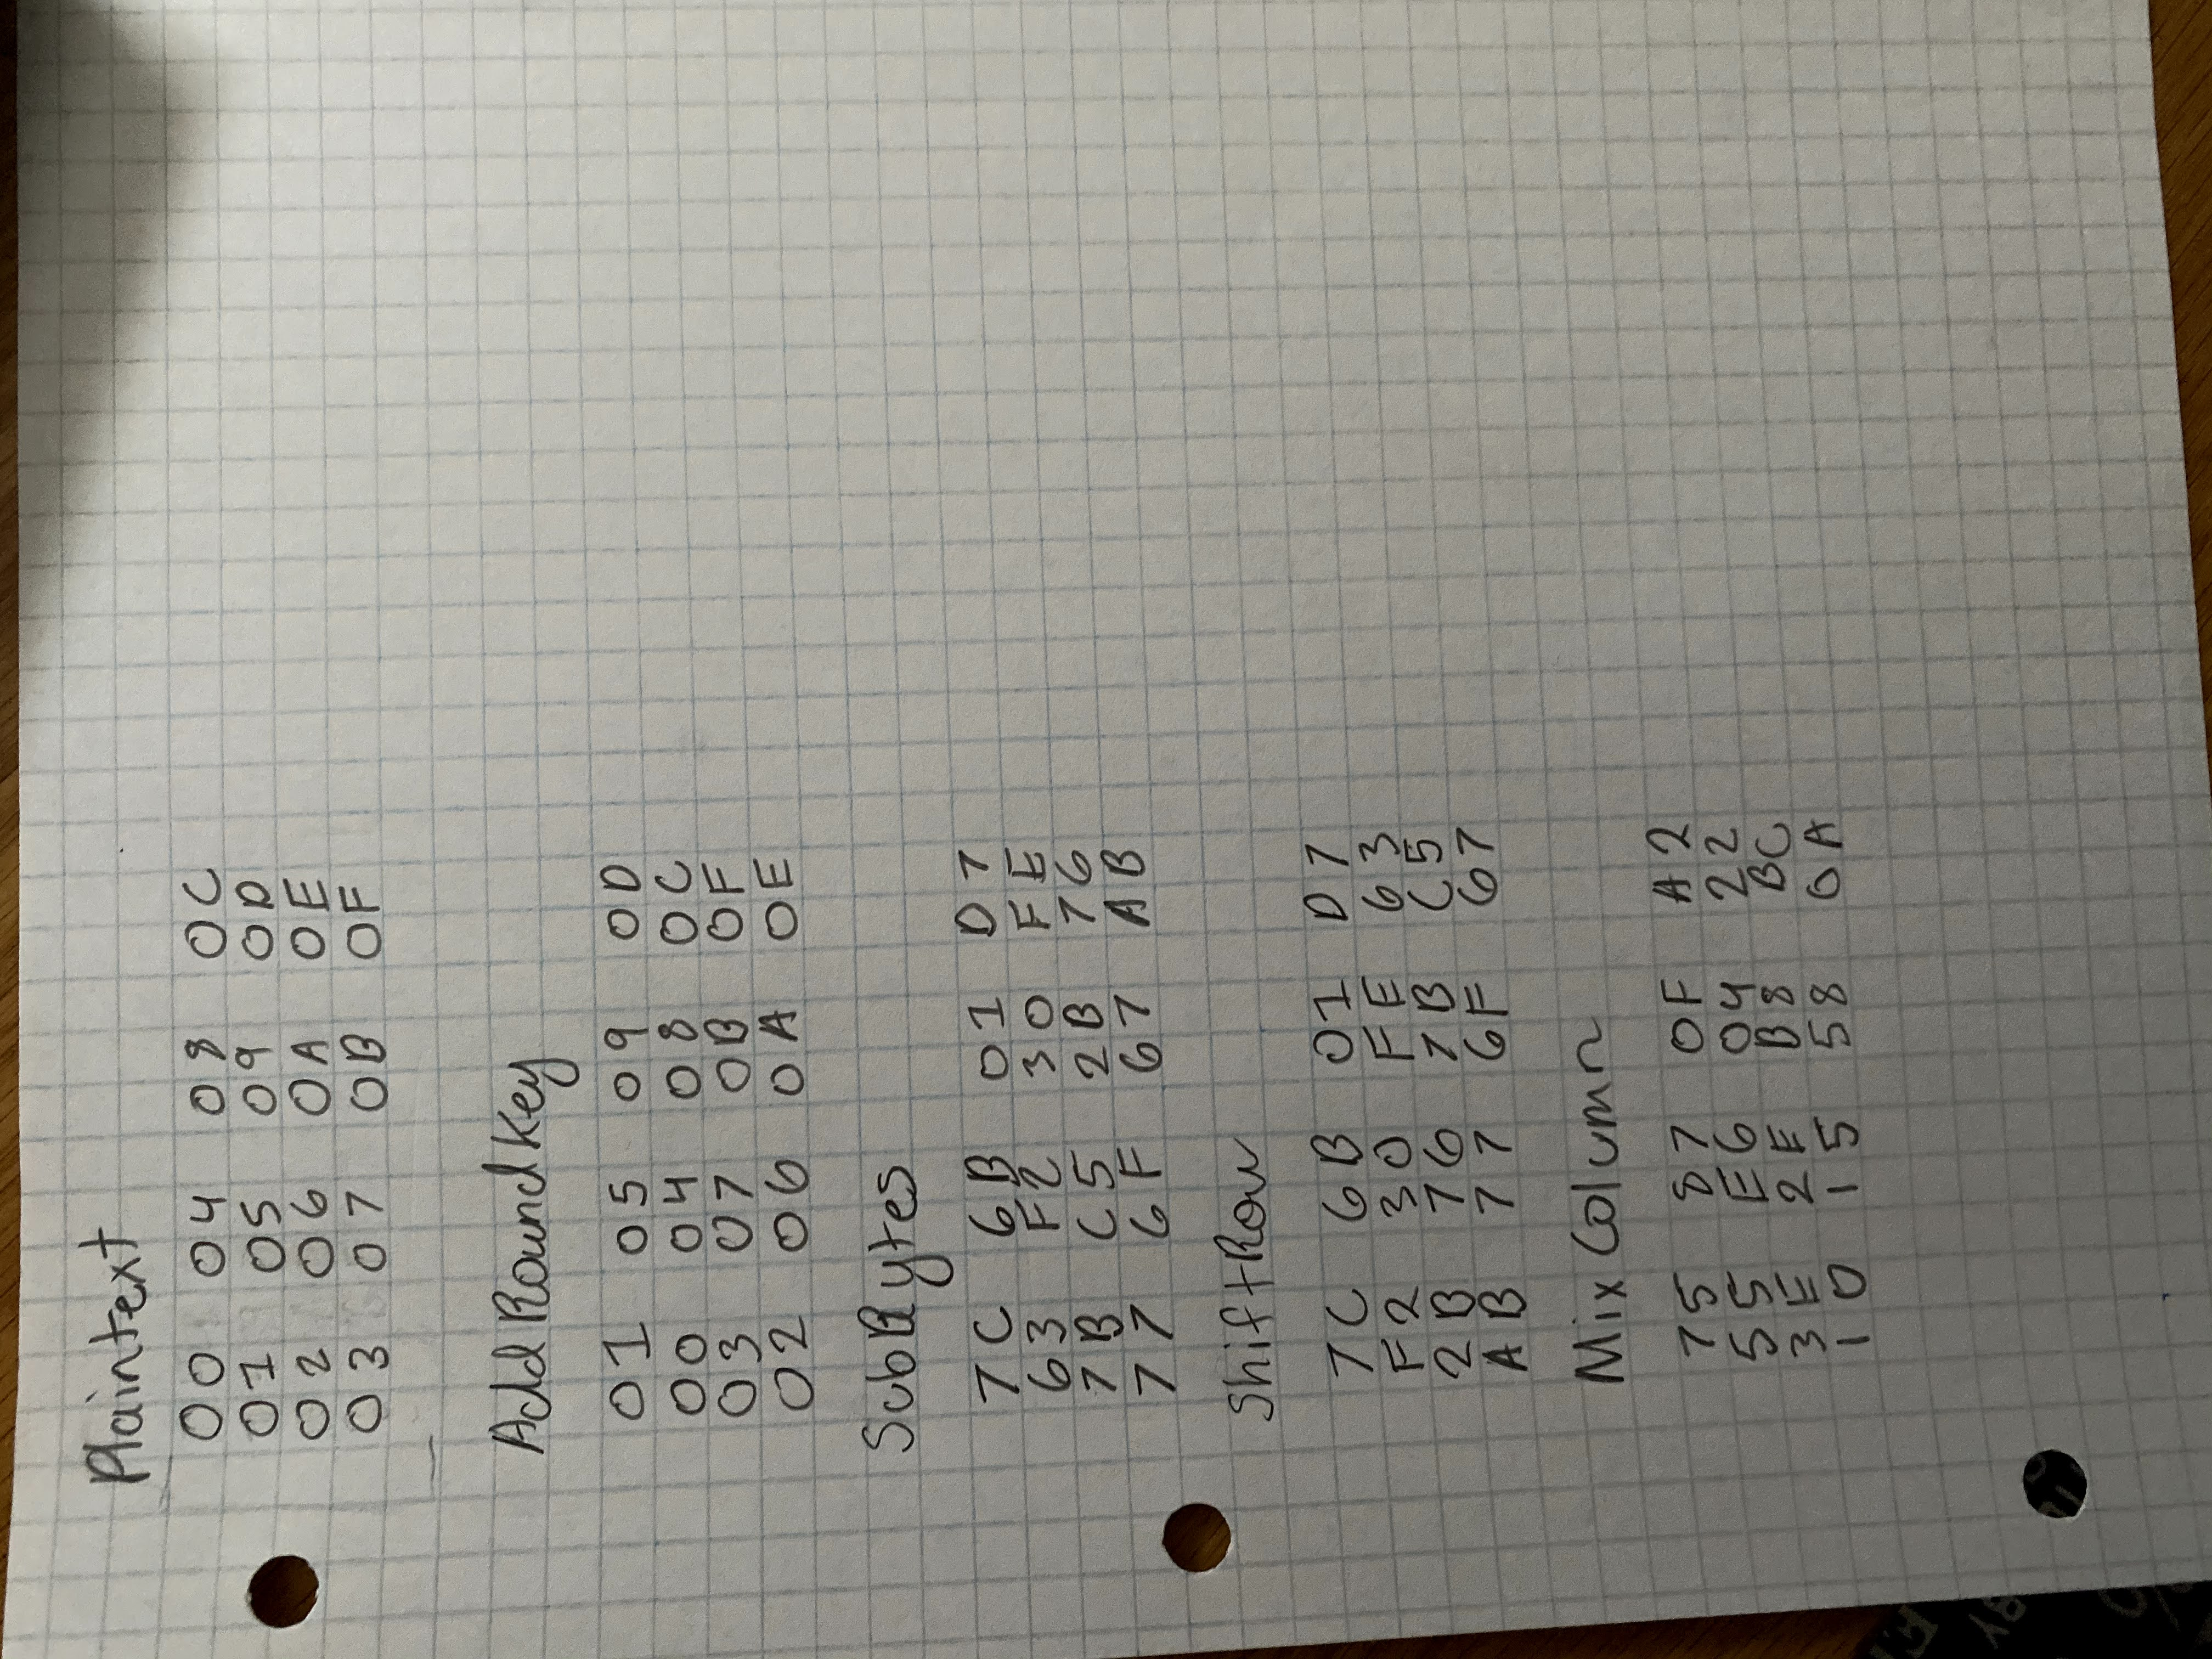


## 6.6
AES and DES are very different. One operates on bits, and the other on bytes.

### DES

  - Has smaller key, less secure
  - Slower encryption and decryption
  - 16 Rounds of encryption, with the following steps
  - Expansion
  - Permutation
  - XOR with the _
  - Substitution with S-box
  - Substitution with the corresponding P-box
  - Swap _

### AES
   - Has larger keys (128, 192, 256)
   - Faster then DES
   - Rounds of encryption are based on the key size, with the following steps
   - SubBytes with a preset S-box
   - ShiftRows ```>>> list.append(list.pop(0)) ```
   - MixColumns
   - AddRoundKeys (generated on-the-fly, or in the beginning)
   



## 7.4
a) No, there are no blocks past P2 that are affected

b) If there is an error at the beginning (i.e. P1) then all ciphertext blocks would be effected. The error would carry through all blocks.

The effect of the receiver would be that it only effects the corresponding plaintext blocks on the receiver side

## 7.5

Each input block would rely on the one before, so encryption would be blocking. You could run them in parrell, but each thread would have to wait for the other, so it would be failed parallelization. In essence, you cannot encrypt in CBC mode using parallelizatoin.

In decryption, all input blocks are not dependant on others, allowing paralelization to be used.

## 8.8
a) With 64 bits of $(v\ ||\ x)$, Bob would have to do $XOR\ (RC4(v\ ||\ x),\ c)$

b) If you are able to find 2 seperate vectors that are equal, for example ($v$<sub>a</sub> == $v$<sub>b</sub>) their corresponding $m$'s could become vulnerable if they use the method in a)

C) See code below

In [ ]:
randomv = 64
print(math.sqrt(math.pow(2, 64))) # same as 2 to the power of 32

4294967296.0


D) This implies that you should change the key before you hit 2<sup>32</sup> messages

# 9.2

In [ ]:
def t(p, q):
  return int((p - 1) * (q - 1))

def gcd(a, b):
    if a == 0:
        return (b, 0, 1)
    else:
        w, y, x = gcd(b % a, a)
        return (w, x - (b // a) * y, y)

def minv(a, m):
    w, a, _ = gcd(a, m)
    if w != 1:
        return
    else:
        return a % m

def encryptRSA(p, q, e, M) -> int:
  n = p * q
  assert math.gcd(t(p, q), e) == 1
  return int(pow(M, e, n))

def decryptRSA(p, q, e, C) -> int:
  n = p * q
  assert math.gcd(t(p, q), e) == 1
  d = minv(e, t(p, q))
  return int(pow(C, d, n))

a)

In [ ]:
p, q, e, M = 3, 11, 7, 5
print("Encryption: ", end="")
C = encryptRSA(p, q, e, M)
print(C)
print("Decryption: ", end="")
print(decryptRSA(p, q, e, C))
p, q, e, M = None, None, None, None

Encryption: 14
Decryption: 5


b)

In [ ]:
p, q, e, M = 5, 11, 3, 9
print("Encryption: ", end="")
C = encryptRSA(p, q, e, M)
print(C)
print("Decryption: ", end="")
print(decryptRSA(p, q, e, C))
p, q, e, M = None, None, None, None

Encryption: 14
Decryption: 9


c)

In [ ]:
p, q, e, M = 7, 11, 17, 8
print("Encryption: ", end="")
C = encryptRSA(p, q, e, M)
print(C)
print("Decryption: ", end="")
print(decryptRSA(p, q, e, C))
p, q, e, M = None, None, None, None

Encryption: 57
Decryption: 8


d)

In [ ]:
p, q, e, M = 11, 13, 11, 7
print("Encryption: ", end="")
C = encryptRSA(p, q, e, M)
print(C)
print("Decryption: ", end="")
print(decryptRSA(p, q, e, C))
p, q, e, M = None, None, None, None

Encryption: 106
Decryption: 7


e)

In [ ]:
p, q, e, M = 17, 31, 7, 2
print("Encryption: ", end="")
C = encryptRSA(p, q, e, M)
print(C)
print("Decryption: ", end="")
print(decryptRSA(p, q, e, C))
p, q, e, M = None, None, None, None

Encryption: 128
Decryption: 2


# 9.3

In [ ]:
n = 35
e = 5
C = 10
ans = None
for p in range(2, 1000):
  for q in range(2, 1000):
    if p * q == n:
      ans = decryptRSA(p, q, e, C)
  if ans:
    break
print("Plaintext M:", ans)

Plaintext M: 5


# 9.4

In [ ]:
n = 3599
e = 31
flag = None
for p in range(2, 10000):
  for q in range(2, 10000):
    if p * q == n:
      flag = 1
      break
  if flag:
    break

n = t(p, q)
d = minv(e, n)
print("Private Key: ", d)

Private Key:  3031


---
# 9.7
No this is not safe, because if the same modulus is the same, it is easy to find p and q, and from there compute the public and private key.

# 9.18

$Z = r^e\ mod(n)$

$X = Z * C\ mod(n)$

$t = r^{-1}\ mod(n)$

$Y = X^d\ mod(n)$1

This means

$r = Z^d\ mod(n)$

and 

$ M = C^d\ mod(n)$

Doing some substitution

$Y = r * M\ mod(n)$

We can then split up how we look at $M$ into slices of $i$, where $i$ is a natural number

$r * M = i * n + Y$

Rearranging you get, 

$M_i = (i * n + Y)/r$

With this information, and the fact that

$C_i = {M_i}^e\ mod(n)$

By comparing blocks of $C_i$ with the old Cipher text he can create new $M_i$


# 10.1

In [ ]:
q = 71
alpha = 7

a)

In [ ]:
XA = 15
print("Alice's private key is:", pow(alpha, XA, q))

Alice's private key is: 23


b)

In [ ]:
YB = pow(alpha, 27, q)
print("Bob's private key is:", pow(alpha, 27, q))

Bob's private key is: 21


c)

In [ ]:
print("There shared key is:", pow(YB, XA, q))

There shared key is: 34


# 10.15



$G = (2, 7)$

$E_{11} = (1, 6)$

$n_B = 7$

$P_M = (10, 9)$

$k = 3$

a) 

$=\ 7\ *\ G =\ (2, 7)$


b) 

$C_m = \{kG, P_m + kP_B\} $

$C_m = \{(8, 3), (10, 2)\}$


c)

$P_m = \{kP_b - n_b\ (kG, P_m)\} $

$P_m = (10, 9)$

# 11.4

If we look at 1 round of DES, we see that it has a one-way function, $F$ and an XOR.

We also know that in a round, the block is split into 2 halves. 

Let $L$ represent the left side [0, 32)

Let $R$ represent the right side [32, 64)

$F$ = $(K_{AB}, M)$ and its main job is to map $R$ to $K$ and output 32 bits

??80 bits wtf is that




# 11.6

It is false.

Collison resistant doesn't mean that for every unique input you get a unique output: it means its unfeasible, that you will get the same output. You are to some degree sure that it is different.

# 12.3 

$T = mac(K, M)$


$mac$ is defined as:

$A(K, (xor(T, xor(M, T))) = T$

# 12.6

# 13.2

The signature should be recalcuted because the validity of message $M$ and $r$ may be compromised


# 13.3

If k is leaked, attacker can use this to find the private key used.



# 13.7

# 14.1

a)

Computer A requests B to connect, with $N_a$ in its header.

If Computer B accepts, it requests a session key from the KDC. The request contains A nonce $N_a$ and a nonce $N_b$. The request is sent over an encrypted connection, encrypted with a key

b)

It is more efficient, as if the key gets rejected, extra computation to communicate with the KDC is avoided.

# 14.7

# 15.6

If $C_i$ is and $C_{i+1}$ don't arrive in the correct order, it will only effect the decrypted blocks of plaintext.

Proof:

To begin, we start with what it would look like if the blocks came in order, and then compare them with blocks arriving in a different order

Let the ciphertext be $C$

Let the plaintext be $P$

Let the key be represented by $K$

Let a random IV be represented by `os.urandom(n)` (just random bytes)

Let $D()$ mean decryption (E doesn't help with readablilty)

When decrypting these blocks you get:

$xor(D(K,\ C_1),\ IV)\ \ =>\ P_1$

This $P_1$ is then XOR'ed with the ciphertext. The output of this is used with and XOR of the decrypted block $C_2$. This process repeats.

$xor(D(K,\ C_2),\ xor(P_1,\ C_1))\ \ =>\ P_2$

The same process is followed to give $P_3$

$xor(D(K,\ C_3),\ xor(P_2,\ C_2))\ \ =>\ P_3$

Now, lets mess up the blocks. Let us say that $C_1$ and $C_2$ are flipped. 

Let G be the plaintext blocks after messing up the cipher blocks.

If $C_2$ comes first, then

$G_1 = xor(D(K,\ C_2),\ IV)$

$G_2 = xor(D(K,\ C_1), xor(C_2,\ G_1)$

Now we are putting a block in the right order. Note the $C_3$

$G_3 = xor(D(K, \ C_3), xor(P_2,\ C_2))$

We notice that $G_3$ is the same as $P_3$

The blocks that are sequentionally out of order are the ones that are effected.

$P_1\ \ !=\ \ G_1$ and $P_2\ \ !=\ \ G_2$


$QED$


# 15.8


a)

$A\ =>\ B:\ ID_A$ ... means it will authenticate $A$ to $B$

$B\ =>\ A:\ R_1$ ... means $R_1$ represents a challenge. $R_1$ can only be encrypted by A, to allow it to be decrypted with $A$'s public key.


b)

MiTM Attacks. If someone can get A to sign a message, they can show this signature to someone else and pretend it was sent from A.

# 15.10

If the ticket doesn't include the Id and signature encrypted with alice's public key, then Bob knows to reject it.

# 17.3

a) TLS uses asymmetric encryption. There are no currently demonstrated attacks that can break the 1024 bit keys that are used

b)


c) Nonce


d) MiTM attacks are stopped by using certificates. It checks whether or not the domin name of the server is corresponding with the domain name of the certificate. However, I have demonstrated before with the use of [Evilginx](https://github.com/kgretzky/evilginx2), that this can be "broken", by creating a TLS/SSL connection to a server, that has a slightly modified url. I have attached the video (I also bypass MFA :)). Technically it doesn't break TLS, but it uses TLS to give the user a false sense of security.

e) Traffic is encrypted, so the user would not be able to see the passwords. However, take a look at my video above, and I show how to grab the passwords over TLS

f) TLS doesn't rely on IP addressing, it is on a seperate layer.

g) The attacker would need the encryption key to understand the traffic being sent to her, or send any information that she sends will be rejected on the reciveing side.

h) TLS cannot protect agains SYN flooding attacks, as they are at a different layer

# 18.3